## MIE1624-Assignment1:

####Q1

In recent years, with the development of data science, more and more people have started to pay attention to this field. This report investigates the gender composition and the effects of education levels on compensation in Data Science and Machine Learning. All analyses in this study are based on the survey results of the 2021 "Kaggle ML and DS Survey Challenge" competition.

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random

In [ ]:
# read dataset
data = pd.read_csv("clean_kaggle_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# select the specific columns to analyze
selected_data = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q25']]
selected_data = selected_data.rename(columns={'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Experience', 'Q25': 'Compensation'})
selected_data

,Age,Gender,Country,Education,Experience,Compensation
0,50-54,Man,India,Bachelor’s degree,Other,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,40000
4,45-49,Man,India,Doctoral degree,Other,40000
...,...,...,...,...,...,...
15386,30-34,Man,India,Bachelor’s degree,Data Analyst,4000
15387,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,90000
15388,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,20000
15389,50-54,Man,Sweden,Doctoral degree,Research Scientist,1000


In [ ]:
# subset the composition of the participants' education levels.
df4 = selected_data.groupby(['Education'])['Education'].count()
df4 = pd.DataFrame({'Education':df4.index, 'Count':df4.values})
df4

,Education,Count
0,Bachelor’s degree,4777
1,Doctoral degree,2217
2,I prefer not to answer,334
3,Master’s degree,6799
4,No formal education past high school,228
5,Professional doctorate,290
6,Some college/university study without earning ...,746


In [ ]:
# subset the composition of the participants' roles.
df5 = selected_data.groupby(['Experience'])['Experience'].count()
df5 = pd.DataFrame({'Experience':df5.index, 'Count':df5.values})
df5

,Experience,Count
0,Business Analyst,885
1,DBA/Database Engineer,151
2,Data Analyst,2039
3,Data Engineer,597
4,Data Scientist,3240
5,Developer Relations/Advocacy,86
6,Machine Learning Engineer,1327
7,Other,2204
8,Product Manager,285
9,Program/Project Manager,784


First, we did a data analysis of the main characteristics. The histogram below shows the average annual compensation of each participant in the survey. The histogram distribution is right-skewed, with the vast majority of participants having less than 200,000 in yearly salary. The peak of the histogram sits in the range of 0 to 50,000, while some outliers lie between the range from 950000 to 10^6.

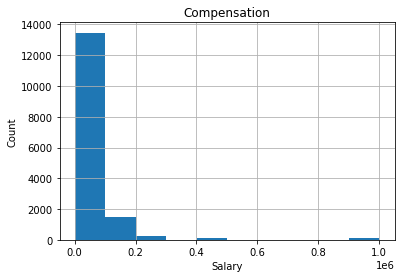

In [ ]:
# histogram of Salary for all participants
# Figure1
selected_data[['Compensation']].hist()
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

Then I analyzed the participants' highest level of formal education. Since education level is a categorical variable, analyzing through a bar chart would be a better choice. The horizontal bar chart below demonstrates that more than 6,500 people have received or plan to attain a master's degree within the next two years, which is the most. Followed by this is the bachelor's degree, with more than 4,500 people choosing this option. And over 2,000 people chose the doctoral degree option. This bar chart indicates that the majority of participants in Data Science and Machine Learning are inclined to obtain a higher degree. 

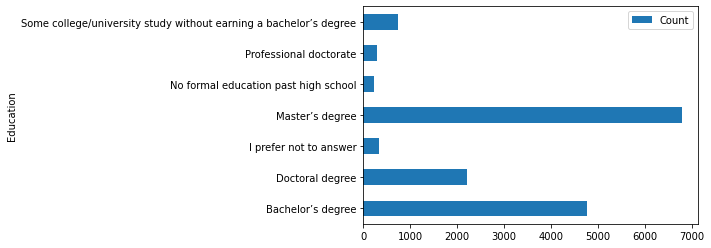

In [ ]:
# horizontal bar chart of Education for all participants
# Figure2
df4.plot.barh(x='Education', y='Count', rot=0)

Furthermore, I analyzed the composition of the current roles for all participants. According to the horizontal chart below, most people are in data scientist positions, with over 3000 people. The following preferred choices were software engineer and data analyst; the difference between these positions is minimal. Besides, a large portion of participants chose the 'other' option. This may indicate that Data Science and Machine Learning are growing rapidly, and the positions are constantly being updated.

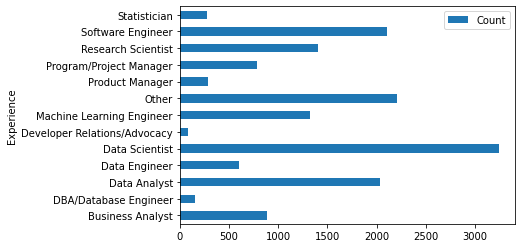

In [ ]:
# horizontal bar chart of Professional Experience for all participants
# Figure3
df5.plot.barh(x='Experience', y="Count", rot = 0)

In [ ]:
# check whether the Salary and Gender columns have nan values.
check_for_nan_G = selected_data['Gender'].isnull().values.any()
check_for_nan_S = selected_data['Compensation'].isnull().values.any()
print (check_for_nan_G, check_for_nan_S) # no missing values to be removed.

False False


In [ ]:
# select the columns about gender and yearly salary of all the participants
# subset the rows answered "Man" and "Woman" in the Gender question
salary_gender = selected_data[['Gender', 'Compensation']]
salary_gender = salary_gender[(salary_gender["Gender"] == 'Man') | (salary_gender["Gender"] == 'Woman')]

####Q2

To meet our research objective on the difference between the salary of males and females, I checked the dataset for missing values. After that, I reported descriptive statistics for each group by plotting a box plot and a descriptive table. Both the plot and table below showed the annual salary summary for females and males. In both gender groups, most of the participant's compensation is below 150,000, and only some outliers are distributed in the range of 200,000 to 10^6. Furthermore, compared to female salaries, male salaries are higher than female salaries at all stages according to the plot, such as median, 75th percentile and maximum. And the table proved this point as well.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


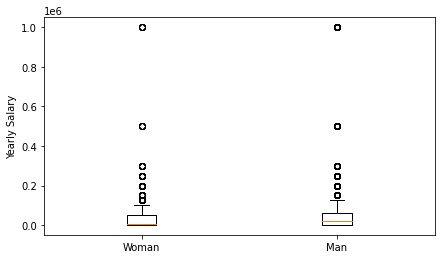

In [ ]:
# Figure4
from matplotlib.pyplot import figure

figure(figsize=(7, 4))

# plot a box plot of compensation of both woman and man based on the response of question 25
female_salary = salary_gender[salary_gender['Gender'] == 'Woman']['Compensation']
male_salary = salary_gender[salary_gender['Gender'] == 'Man']['Compensation']

gend = list(['Woman', 'Man'])

plt.boxplot([female_salary,male_salary],labels=gend)
plt.ylabel("Yearly Salary")
plt.show()

In [ ]:
#Table1
# a descriptive table showing the compensation of males and females
gender_data_salary = salary_gender.groupby('Gender')
gender_data_salary.describe()

Compensation                                                       \
              count          mean           std     min     25%      50%   
Gender                                                                     
Man         12642.0  51193.600696  99979.274378  1000.0  2000.0  20000.0   
Woman        2482.0  34816.881547  72017.347888  1000.0  1000.0   7500.0   

                            
            75%        max  
Gender                      
Man     60000.0  1000000.0  
Woman   50000.0  1000000.0

The null hypothesis for our research objective is there is no difference of the expected salary between genders ($μ_1$ = $μ_2$, where $μ_1$ and $μ_2$ represents the population mean of salary on males and females, respectively) , while the alternative hypothesis is the expected salary in gender is different to each other. 

To examine our hypothesis, I performed a two sample t-test and the result is shown below. The result showed the p-value is smaller than 0.05, which indicates the difference observe in data is most likely not due to chance. Thus, we could conclude it is statistically significant and there is a difference of compensation between males and females.

In [ ]:
#table2
ts, ps = stats.ttest_ind(female_salary, male_salary)
print ("t-test: t = %g  p = %g" % (ts, ps))

t-test: t = -7.77406  p = 8.08881e-15


Bootstrapping could obtained suitably accurate information from an appropriately drawn sample. Hence I bootstrapped the data 1000iterations on two groups for comparing the mean of salary. Since the bootstrapped sample size is relative small to the group size, the sample size I chose for the males are 1200 observations and 200 observations for the females.

In [ ]:
random.seed(500)
# bootstrapped for the males with sample size = 1200 on 1000 iterations. 
# bootstrapped for the females with sample size = 200 on 1000 iterations. 

boot_mean_male = []
boot_mean_female = []
boot_mean_diff = []
for i in range(1000):
  boot_sample_m = male_salary.sample(n = 1200, replace = True)
  boot_sample_f = female_salary.sample(n = 200, replace = True)

  boot_mean_m = boot_sample_m.mean()
  boot_mean_f = boot_sample_f.mean()

  boot_mean_male.append(boot_mean_m)
  boot_mean_female.append(boot_mean_f)
  boot_mean_diff.append(abs(boot_mean_m - boot_mean_f))


To test whether the bootstrapped sample could represent the population statistically, I did the Shapiro test for two groups after 1000 iterations since the Shapiro test is able to examine how close the sample data fit a normal distribution. The p-values in the result of both bootstrapped samples are less than 0.05, proving that the sampling distribution obtained through bootstrapping can be used for hypothesis testing. Moreover, the histogram distributions of both groups are normally distributed so that we could conclude the same result based on the Central Limit Theorem.

In [ ]:
#table3
shapiro_test_m = stats.shapiro(boot_mean_male)
shapiro_test_f = stats.shapiro((boot_mean_female))
print(shapiro_test_m, shapiro_test_f)

ShapiroResult(statistic=0.9933409690856934, pvalue=0.00018989447562489659) ShapiroResult(statistic=0.9845420718193054, pvalue=8.539536189289265e-09)


The bootstrapped distributions showed both distributions are normally distributed. Besides, the center of the females is around 35000 while the males is around 52000. The yearly compensation of the males is higher than the females based on the overall trend of the distributions

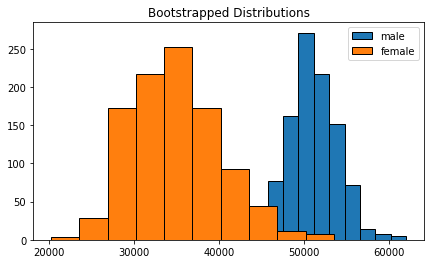

In [ ]:
# Figure5
figure(figsize=(7, 4))

# plot the bootstrapped distributions
plt.hist(boot_mean_male, edgecolor='black', label = "male")
plt.hist(boot_mean_female, edgecolor='black',label = "female")
plt.title("Bootstrapped Distributions")
plt.legend(loc='upper right')

The center of the distribution of the difference is around 17000, indicating the approximate difference in means of salary between the two groups.

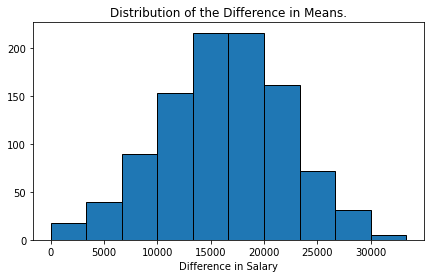

In [ ]:
# Figure6
figure(figsize=(7, 4))
# plot the distribution of the difference in Means of Salaries
plt.hist(boot_mean_diff, edgecolor='black')
plt.xlabel('Difference in Salary')
plt.title('Distribution of the Difference in Means.')
plt.show()

The t-test result on bootstrapped samples showed the p-value is smaller than 0.05, which indicates the difference observe in data is most likely not due to chance. Thus, we could conclude it is statistically significant and there is a difference of compensation between males and females.

In [ ]:
#Table4
# t-tests on bootstrapped samples.
tb, pb = stats.ttest_ind(boot_mean_female, boot_mean_male)
print ("t-test: t = %g  p = %g" % (tb, pb))

t-test: t = -87.3128  p = 0


####Q3

In [ ]:
# check whether the Education have nan values.
check_for_nan_E = selected_data['Education'].isnull().values.any()
print (check_for_nan_E) # no missing values to be removed.

False


In [ ]:
# select the columns about gender and Education of all the participants
# subset the rows answered "Bachelor’s degree", "Master’s degree", "Doctoral degree"
edu_salary = selected_data[['Compensation', 'Education']]
edu_salary = edu_salary [(edu_salary ["Education"] == 'Bachelor’s degree') | (edu_salary ["Education"] == 'Master’s degree')| (edu_salary ["Education"] == 'Doctoral degree')]


To investigate the effects of education on income level (mainly focused on Bachelor's Degree, Master's Degree and Doctoral Degree), the boxplot and descriptive table are shown below. Both of them demonstrated that the annual compensation of a Doctoral Degree is higher than Master's Degree higher than Bachelor's Degree at all stages, such as median, 75th percentile and maximum.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


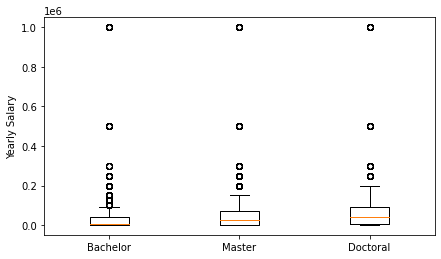

In [ ]:
# Figure7
from matplotlib.pyplot import figure

figure(figsize=(7, 4))

# plot a box plot of Education on salary 
bachelor_salary = edu_salary [edu_salary ["Education"] == 'Bachelor’s degree']['Compensation']
master_salary = edu_salary [edu_salary ["Education"] == 'Master’s degree']['Compensation']
doctoral_salary = edu_salary [edu_salary ["Education"] == 'Doctoral degree']['Compensation']

gend = list(['Bachelor', 'Master', 'Doctoral'])

plt.boxplot([bachelor_salary,master_salary, doctoral_salary],labels=gend)
plt.ylabel("Yearly Salary")
plt.show()

In [ ]:
#Table5
# a descriptive table showing the compensation of education levels
edu_data_salary = edu_salary.groupby('Education')
edu_data_salary.describe()

Compensation                                               \
                         count          mean            std     min     25%   
Education                                                                     
Bachelor’s degree       4777.0  35578.291815   89382.060777  1000.0  1000.0   
Doctoral degree         2217.0  70641.181777  117160.947589  1000.0  4000.0   
Master’s degree         6799.0  52706.868657   90928.786678  1000.0  3000.0   

                                                
                       50%      75%        max  
Education                                       
Bachelor’s degree   7500.0  40000.0  1000000.0  
Doctoral degree    40000.0  90000.0  1000000.0  
Master’s degree    25000.0  70000.0  1000000.0

The null hypothesis for our research objective is there is no difference of the expected salary between educational levels ( μ1  =  μ2 = $μ_3$, where  μ1, μ2, $\mu_3$ represents the population mean of salary on Bachelor's Degree, Master's Degree and Doctoral Degree respectively) , while the alternative hypothesis is at least one group has a different mean.

To examine our hypothesis, I performed a one-way ANOVA test since ANOVA is typically used for more than two independent groups using F distribution. The result is shown below. The result showed the p-value is smaller than 0.05, which indicates it is statistically significant and we should reject the null hypothesis.

In [ ]:
#Table6
# apply one-way anova test
from scipy.stats import f_oneway

fe, pe = f_oneway(bachelor_salary, master_salary, doctoral_salary)
print ("one-way anova: f = %g  p = %g" % (fe, pe))

one-way anova: f = 109.758  p = 5.1077e-48


Bootstapping is also worked here. The bootstrapped methods are similar to the one we conducted in the previous t-test, the only difference is the sample size I chose for Bachelor's Degree is 400, for Master's Degree is 200 and for Doctoral Degree is 600. All the bootstrapped samples passed the Shapiro test since the p-values are smaller than 0.05, which indicates it is statistically significant.

In [ ]:
random.seed(500)
# bootstrapped for the bachelor with sample size = 400 on 1000 iterations. 
# bootstrapped for the master with sample size = 200 on 1000 iterations. 
# bootstrapped for the doctoral with sample size = 600 on 1000 iterations. 

boot_mean_b = []
boot_mean_m = []
boot_mean_d = []
boot_mean_diff_bm = []
boot_mean_diff_md = []
boot_mean_diff_bd = []

for i in range(1000):
  boot_sample_ba = bachelor_salary.sample(n = 400, replace = True)
  boot_sample_ma = master_salary.sample(n = 200, replace = True)
  boot_sample_do = doctoral_salary.sample(n = 600, replace = True)

  boot_mean_ba = boot_sample_ba.mean()
  boot_mean_ma = boot_sample_ma.mean()
  boot_mean_do = boot_sample_do.mean()

  boot_mean_b.append(boot_mean_ba)
  boot_mean_m.append(boot_mean_ma)
  boot_mean_d.append(boot_mean_do)

  boot_mean_diff_bm.append(abs(boot_mean_ba - boot_mean_ma))
  boot_mean_diff_md.append(abs(boot_mean_ma - boot_mean_do))
  boot_mean_diff_bd.append(abs(boot_mean_ba - boot_mean_do))

In [ ]:
#Table7
shapiro_test_b = stats.shapiro(boot_mean_b)
shapiro_test_m = stats.shapiro(boot_mean_m)
shapiro_test_d = stats.shapiro(boot_mean_d)
print(shapiro_test_b.pvalue, shapiro_test_m.pvalue, shapiro_test_d.pvalue)

3.8316053108111703e-10 1.837392915149394e-06 0.02928406186401844


The bootstrapped distributions showed all distributions are normally distributed. Besides, the center of Bachelor is around 35000 while Master's is around 52000 and Doctoral is around 72000. The yearly compensation of the Doctoral is higher than the Master higher than the Bachelor based on the overall trend of the distributions.

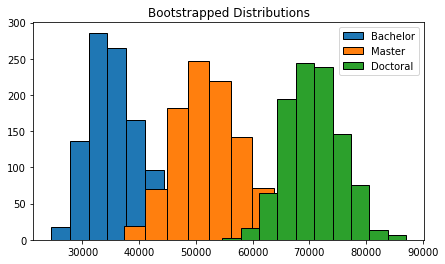

In [ ]:
#Figure8
figure(figsize=(7, 4))

# plot the bootstrapped distributions
plt.hist(boot_mean_b, edgecolor='black', label = "Bachelor")
plt.hist(boot_mean_m, edgecolor='black',label = "Master")
plt.hist(boot_mean_d, edgecolor='black',label = "Doctoral")

plt.title("Bootstrapped Distributions")
plt.legend(loc='upper right')

Besides, the distribution of the difference in Means showed the centers of difference between Bachelor-Master and Master-Doctoral locate near around 18000, while the center of difference of Bachelor-Doctoral locates at around 35000.

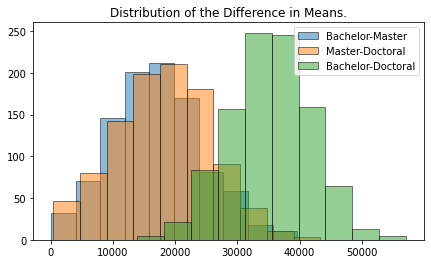

In [ ]:
#Figure9
figure(figsize=(7, 4))

# plot the bootstrapped distributions of difference
plt.hist(boot_mean_diff_bm, alpha=0.5, edgecolor='black', label = "Bachelor-Master")
plt.hist(boot_mean_diff_md, alpha=0.5, edgecolor='black',label = "Master-Doctoral")
plt.hist(boot_mean_diff_bd, alpha=0.5, edgecolor='black',label = "Bachelor-Doctoral")
plt.title("Distribution of the Difference in Means.")
plt.legend(loc='upper right')

The one-way ANOVA result on bootstrapped samples showed the p-value is also smaller than 0.05. Thus, we could conclude it is statistically significant and conclude the same result as the non-bootstrapped population.

In [ ]:
#Table8
# one-way anova on bootstapped samples
feb, peb = f_oneway(boot_mean_b, boot_mean_m, boot_mean_d)
print ("one-way anova: f = %g  p = %g" % (feb, peb))

one-way anova: f = 11537.9  p = 0
